# Generate BEL2ABM Figure

This notebook presents the results of the replicates of the BEL2ABM simulation of amyloid beta processing.

In [1]:
import matplotlib.pyplot as plt
import os
import pandas as pd
import sys
import time

In [2]:
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

In [3]:
print(sys.version)

3.6.3 (default, Oct  9 2017, 09:47:56) 
[GCC 4.2.1 Compatible Apple LLVM 9.0.0 (clang-900.0.37)]


In [4]:
print(time.asctime())

Tue Nov 28 15:38:42 2017


## Load Data

In [5]:
results_folder = os.path.join(os.path.expanduser('~'), 'Desktop', 'SORLA', 'spartan_runs_no_replicates',)

The control data is loaded from the `wo_SORLA_22secr` folder, signifying that no SORL1 was added in the experiments.

In [6]:
clean_run = pd.read_csv(
    os.path.join(results_folder, 'wo_SORLA_22secr', 'results.tsv'),
    sep='\t'
)
clean_run

,mean_sappa_values,mean_sappad_values,sappa_sums,mean_sappb_values,mean_sappbd_values,sappb_sums
10,2.177945,0.140351,2.318296,0.255639,0.002506,0.258145
20,3.781955,0.533835,4.315789,0.355890,0.042607,0.398496
50,6.498747,2.516291,9.015038,0.744361,0.265664,1.010025
100,8.957393,6.894737,15.852130,1.022556,0.621554,1.644110
200,12.428571,16.586466,29.015038,1.273183,1.503759,2.776942
300,13.839599,26.303258,40.142857,1.446115,2.423559,3.869674
400,15.375940,33.568922,48.944862,1.568922,3.315789,4.884712
500,16.476190,39.591479,56.067669,1.736842,3.944862,5.681704
600,17.606516,43.786967,61.393484,1.857143,4.278195,6.135338


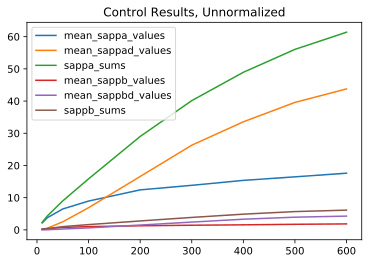

In [7]:
clean_run.plot.line()
plt.title('Control Results, Unnormalized')
plt.show()

The perturbation data is loaded from the `with_3300SORLA_22secr` folder, signifying that SORLA was added to the experiments.

In [8]:
sorl1_run = pd.read_csv(
    os.path.join(results_folder, 'with_3300SORLA_22secr', 'results.tsv'),
    sep='\t'
)
sorl1_run

,mean_sappa_values,mean_sappad_values,sappa_sums,mean_sappb_values,mean_sappbd_values,sappb_sums
10,0.017544,0.000000,0.017544,0.005013,0.000000,0.005013
20,0.037594,0.002506,0.040100,0.002506,0.000000,0.002506
50,0.152882,0.025063,0.177945,0.010025,0.000000,0.010025
100,0.265664,0.095238,0.360902,0.010025,0.007519,0.017544
200,0.598997,0.418546,1.017544,0.070175,0.040100,0.110276
300,0.857143,0.779449,1.636591,0.105263,0.072682,0.177945
400,1.355890,1.411028,2.766917,0.137845,0.117794,0.255639
500,1.839599,2.240602,4.080201,0.223058,0.215539,0.438596
600,2.368421,3.208020,5.576441,0.238095,0.270677,0.508772


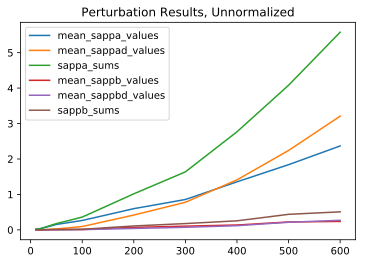

In [9]:
sorl1_run.plot.line()
plt.title('Perturbation Results, Unnormalized')
plt.show()

## Visualization

Multiple different plots are produced to show different aspects of the experiments.

These plots are split by control and perturbation by SORL1 to investigate the effects of the experiment.

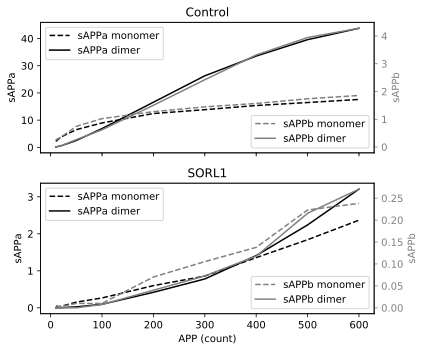

In [10]:
fix, ax = plt.subplots(2, figsize=(6, 5))

ax01 = ax[0]
ax01.set_title('Control')
clean_run['mean_sappa_values'].plot.line(ax=ax01, color='black', linestyle='--', label='sAPPa monomer')
clean_run['mean_sappad_values'].plot.line(ax=ax01, color='black', label='sAPPa dimer')
ax01.set_xlabel('APP (count)')
ax01.set_ylabel('sAPPa', color='black')
ax01.tick_params('y', colors='black')

ax01.legend()

ax02 = ax01.twinx()
clean_run['mean_sappb_values'].plot.line(ax=ax02, color='grey', linestyle='--', label='sAPPb monomer')
clean_run['mean_sappbd_values'].plot.line(ax=ax02, color='grey', label='sAPPb dimer' )
ax02.set_ylabel('sAPPb', color='gray')
ax02.tick_params('y', colors='gray')
ax02.legend(loc=4)

ax11 = ax[1]
ax11.set_title('SORL1')
sorl1_run['mean_sappa_values'].plot.line(ax=ax11, color='black', linestyle='--', label='sAPPa monomer')
sorl1_run['mean_sappad_values'].plot.line(ax=ax11, color='black', label='sAPPa dimer')
ax11.set_xlabel('APP (count)')
ax11.set_ylabel('sAPPa', color='black')
ax11.tick_params('y', colors='black')
ax11.legend()

ax12 = ax11.twinx()
sorl1_run['mean_sappb_values'].plot.line(ax=ax12, color='gray', linestyle='--', label='sAPPb monomer')
sorl1_run['mean_sappbd_values'].plot.line(ax=ax12, color='gray', label='sAPPb dimer')
ax12.set_ylabel('sAPPb', color='gray')
ax12.tick_params('y', colors='gray')
ax12.legend(loc=4)

plt.tight_layout()
plt.savefig('/Users/cthoyt/Desktop/figure1.png', dpi=300)
plt.savefig('/Users/cthoyt/Desktop/figure1.eps')
plt.show()

These plots are split by sAPPa and sAPPb to investigate the effects of the experiment.

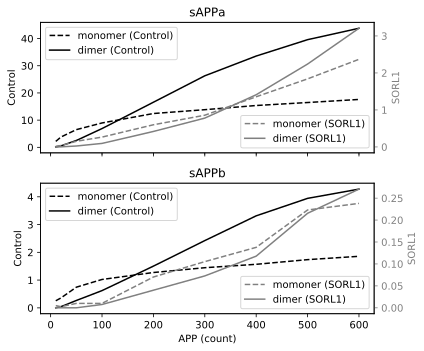

In [11]:
fix, ax = plt.subplots(2, figsize=(6, 5))

ax01 = ax[0]
ax01.set_title('sAPPa')
clean_run['mean_sappa_values'].plot.line(ax=ax01, color='black', linestyle='--', label='monomer (Control)')
clean_run['mean_sappad_values'].plot.line(ax=ax01, color='black', label='dimer (Control)')
ax01.set_xlabel('APP (count)')
ax01.set_ylabel('Control', color='black')
ax01.tick_params('y', colors='black')
ax01.legend()

ax02 = ax01.twinx()
sorl1_run['mean_sappa_values'].plot.line(ax=ax02, color='gray', linestyle='--', label='monomer (SORL1)')
sorl1_run['mean_sappad_values'].plot.line(ax=ax02, color='gray', label='dimer (SORL1)')
ax02.set_ylabel('SORL1', color='gray')
ax02.tick_params('y', colors='gray')
ax02.legend(loc=4)

ax11 = ax[1]
ax11.set_title('sAPPb')
clean_run['mean_sappb_values'].plot.line(ax=ax11, color='black', linestyle='--', label='monomer (Control)')
clean_run['mean_sappbd_values'].plot.line(ax=ax11, color='black', label='dimer (Control)' )
ax11.set_xlabel('APP (count)')
ax11.set_ylabel('Control', color='black')
ax11.tick_params('y', colors='black')
ax11.legend()

ax12 = ax11.twinx()
sorl1_run['mean_sappb_values'].plot.line(ax=ax12, color='gray', linestyle='--', label='momoner (SORL1)')
sorl1_run['mean_sappbd_values'].plot.line(ax=ax12, color='gray', label='dimer (SORL1)')
ax12.set_ylabel('SORL1', color='gray')
ax12.tick_params('y', colors='gray')
ax12.legend(loc=4)

plt.tight_layout()
plt.savefig('/Users/cthoyt/Desktop/figure2.png', dpi=300)
plt.savefig('/Users/cthoyt/Desktop/figure2.eps')
plt.show()